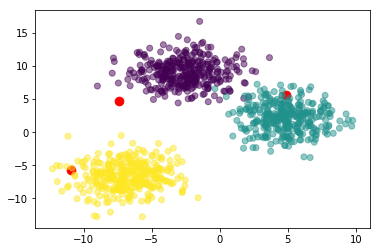

In [10]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

k = 3

X, y = make_blobs(n_samples=1000, n_features=2, 
                  centers=k, random_state=42,
                  cluster_std=2)

min_data_x = np.min(X[:, 0])
max_data_x = np.max(X[:, 0])
min_data_y = np.min(X[:, 1])
max_data_y = np.max(X[:, 1])

random_x_list = [np.random.uniform(min_data_x, max_data_x) for each in range(k)]

random_y_list = [np.random.uniform(min_data_y, max_data_y) for each in range(k)]

centroids = list(zip(random_x_list, random_y_list))

plt.scatter(random_x_list, random_y_list, 
            color='red', s=75, 
            zorder=1, alpha=1)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [11]:
X

array([[-6.31305145, -7.39791954],
       [-5.39543645, -6.28152443],
       [ 5.75653266,  2.12518047],
       ...,
       [ 2.74108106,  7.23793381],
       [ 3.42085443,  1.59922708],
       [-8.00396324, -7.29855334]])

In [12]:
#Need to calculate distance from each point in data set to each of the three centroids.

In [13]:
centroids

[(4.846030287304837, 5.591127633605417),
 (-7.406089427909481, 4.762715855127134),
 (-10.914366701279754, -5.708079572224121)]

In [14]:
df_points = pd.DataFrame(X, columns=['X_Value', 'Y_Value'])

df_points['ED_1'] = (((df_points['X_Value'] - centroids[0][0])**2) + \
                    ((df_points['Y_Value'] - centroids[0][1])**2))**(0.5)

df_points['ED_2'] = (((df_points['X_Value'] - centroids[1][0])**2) + \
                    ((df_points['Y_Value'] - centroids[1][1])**2))**(0.5)

df_points['ED_3'] = (((df_points['X_Value'] - centroids[2][0])**2) + \
                    ((df_points['Y_Value'] - centroids[2][1])**2))**(0.5)

df_points['CLUSTER_ID'] = df_points[['ED_1', 'ED_2', 'ED_3']].idxmin(axis=1)

In [15]:
df_points.head()

,X_Value,Y_Value,ED_1,ED_2,ED_3,CLUSTER_ID
0,-6.313051,-7.397920,17.124265,12.209660,4.901802,ED_3
1,-5.395436,-6.281524,15.679525,11.225773,5.548642,ED_3
2,5.756533,2.125180,3.583546,13.424277,18.419524,ED_1
3,-3.427919,7.314597,8.451544,4.726303,15.021219,ED_2
4,-3.028380,6.008000,7.885438,4.551381,14.122865,ED_2


In [16]:
df_points['CLUSTER_ID'].value_counts().sort_values()

ED_2    237
ED_3    331
ED_1    432
Name: CLUSTER_ID, dtype: int64

In [17]:
new_clusters = [[df_points[df_points['CLUSTER_ID'] == 'ED_1']['X_Value'].mean(), \
df_points[df_points['CLUSTER_ID'] == 'ED_1']['Y_Value'].mean()],

[df_points[df_points['CLUSTER_ID'] == 'ED_2']['X_Value'].mean(), \
df_points[df_points['CLUSTER_ID'] == 'ED_2']['Y_Value'].mean()],

[df_points[df_points['CLUSTER_ID'] == 'ED_3']['X_Value'].mean(), \
df_points[df_points['CLUSTER_ID'] == 'ED_3']['Y_Value'].mean()]]

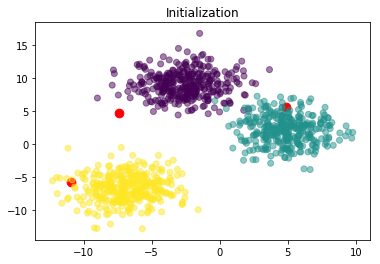

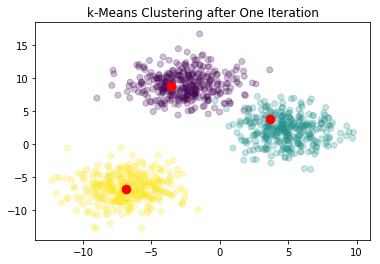

In [18]:
plt.scatter(random_x_list, random_y_list, 
            color='red', s=75, 
            zorder=1, alpha=1)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.title('Initialization')
plt.show()

plt.scatter(np.array(new_clusters)[: , 0], 
            np.array(new_clusters)[: , 1], 
            color='red', s=75, 
            zorder=500, alpha=1)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.25)
plt.title('k-Means Clustering after One Iteration')
plt.show()